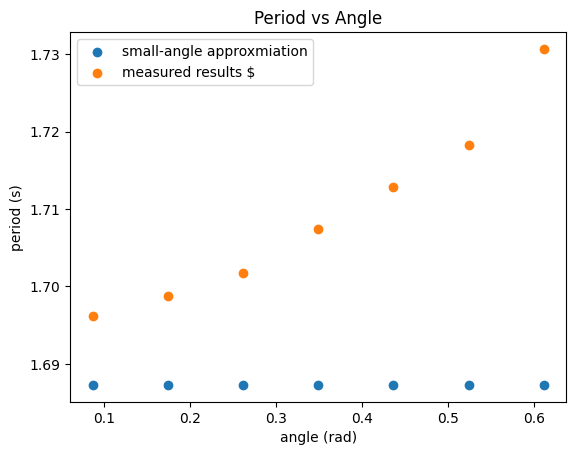

In [34]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

l = 70
g = 970.7

theta_rad = [0.08727, 0.17453, 0.2618, 0.34907, 0.43633, 0.5236, 0.61086]
T0 = 2*pi*(l/g)**(1/2)
T_avg = [1.6962, 1.69883, 1.70177, 1.7074, 1.7128, 1.7183, 1.7307]
errors = [2E-04, 9E-05, 3E-05, 2E-04, 4E-04, 2E-04, 6E-04]


angle_data = np.zeros((3,7))
angle_data[0] = theta_rad
angle_data[1] = T0
angle_data[2] = T_avg

plt.title('Period vs Angle')
plt.scatter(angle_data[0], angle_data[1], label = 'small-angle approxmiation')
plt.scatter(angle_data[0], angle_data[2], label = 'measured results $')
plt.xlabel('angle (rad)')
plt.ylabel('period (s)')
plt.legend()
plt.show()

In [35]:
angle_data[2]/T0

array([1.00528843, 1.00684716, 1.00858961, 1.01192635, 1.01512677,
       1.01838646, 1.02573558])

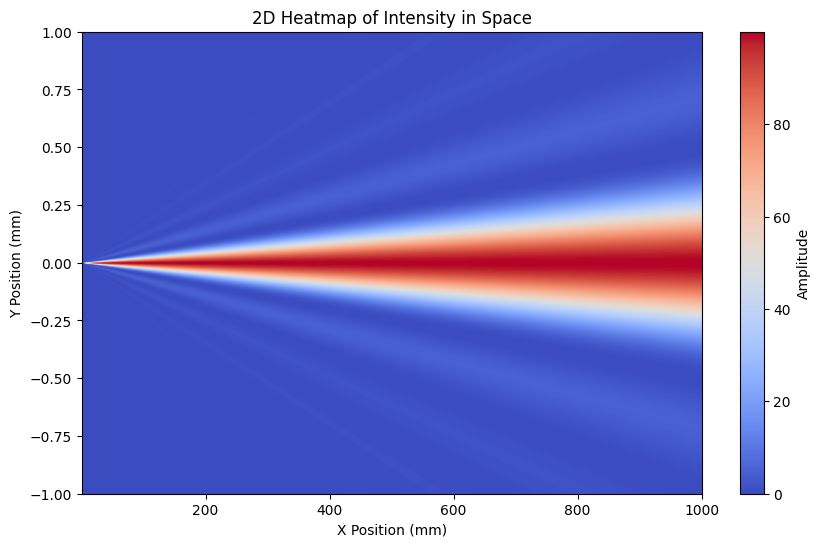

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
%matplotlib inline

Int = 100. #intensity of incoming wave
a = 1 #size of the slit (mm)
lambda_ = 500e-6 #wavelength (mm)

# Define the wave equation
def wave(x, y):
    beta = np.pi*a*np.sin(np.arctan(y/x))/lambda_
    return Int*(np.sin(beta)/beta)**2

# Generate x and t values
x = np.linspace(0.1, 1000, 1000)
y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y)  # Create a meshgrid for x and t values
I = wave(X, Y)  # Compute the amplitude for every combination of x and t

plt.figure(figsize=(10, 6))
plt.imshow(I, aspect='auto', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap = 'coolwarm')
plt.colorbar(label="Amplitude")
plt.title("2D Heatmap of Intensity in Space")
plt.xlabel("X Position (mm)")
plt.ylabel("Y Position (mm)")

plt.show()

interactive(children=(FloatSlider(value=0.0005, description='Wavelength (mm)', max=0.001, min=0.0001, step=1e-…

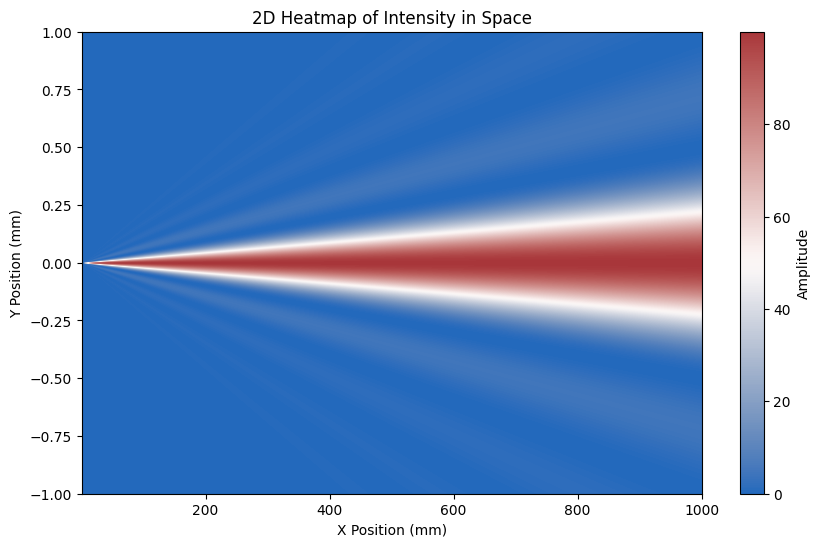

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import clear_output
from seaborn import cm
%matplotlib inline

# Constant intensity
Int = 100.0  # Intensity of incoming wave

def wave(x, y, lambda_, a): #Int comes from above
    beta = np.pi * a * np.sin(np.arctan(y / x)) / lambda_
    return Int * (np.sin(beta) / beta) ** 2

x = np.linspace(0.1, 1000, 1000)
y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y) 

# Plotting function with two parameters - the ones that vary
def plot_wave(lambda_):
    I = wave(X, Y, lambda_, a)  # X and Y come from above
    fig = plt.figure(figsize=(10, 6)) # save fig
    plt.imshow(I, aspect='auto', origin='lower', extent=[x.min(), x.max(), y.min(), y.max()], cmap=cm.vlag)
    plt.colorbar(label="Amplitude")
    plt.title("2D Heatmap of Intensity in Space")
    plt.xlabel("X Position (mm)")
    plt.ylabel("Y Position (mm)")

    display(fig)


interact(plot_wave, 
         lambda_=FloatSlider(value=500e-6, min=100e-6, max=1000e-6, step=10e-6, description='Wavelength (mm)', continuous_update=True));
         #a=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Slit Size (mm)', continuous_update=True)); 
